In [1]:
import sys
sys.path.append('/mnt/d/packing/code/core/')
import kaggle_support as kgs
import importlib
importlib.reload(kgs)

local
local


<module 'kaggle_support' from '/mnt/d/packing/code/core/kaggle_support.py'>

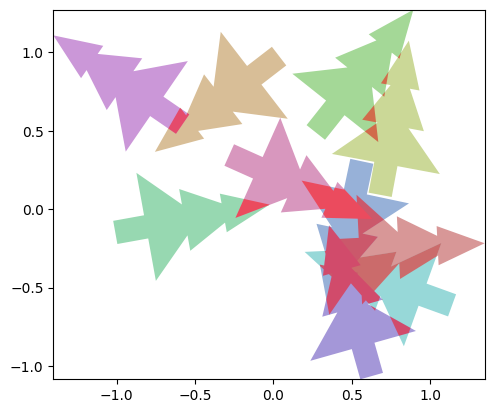

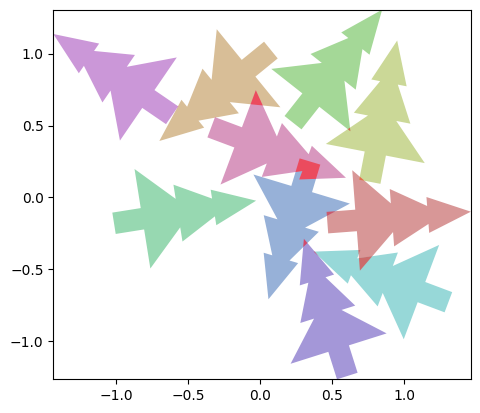

In [2]:
import pack_basics
import pack_vis
importlib.reload(pack_basics)
importlib.reload(pack_vis)
tree_list = pack_basics.place_random(10, 2)
pack_vis.visualize_tree_list(tree_list)

import pack_cost
import numpy as np
from matplotlib import animation
from IPython.display import HTML
cost = pack_cost.PackingCost()
cost.collision_cost = pack_cost.CollisionCostOverlappingArea()

N_steps = 100
dt = 0.01
xyt_list = np.zeros((N_steps, tree_list.N, 3))
for i_step in range(N_steps):
    xyt_list[i_step] = tree_list.xyt
    total_cost, total_grad = cost.compute_total_cost_ref(tree_list.xyt, include_gradients=True)
    tree_list.xyt -= dt * total_grad

pack_vis.visualize_tree_list(tree_list)



/mnt/d/packing/code/core/pack_vis.py:56: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


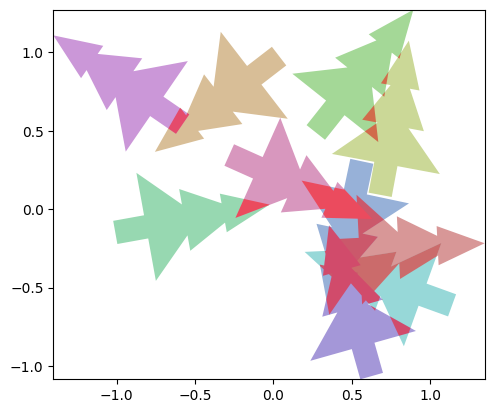

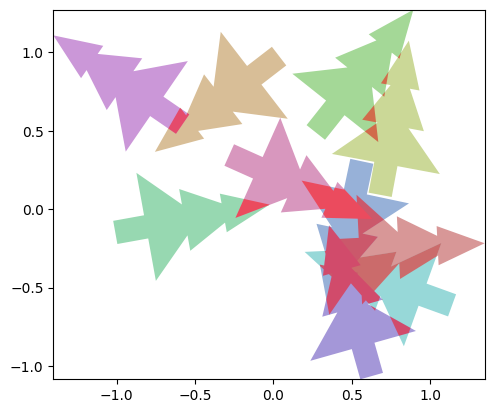

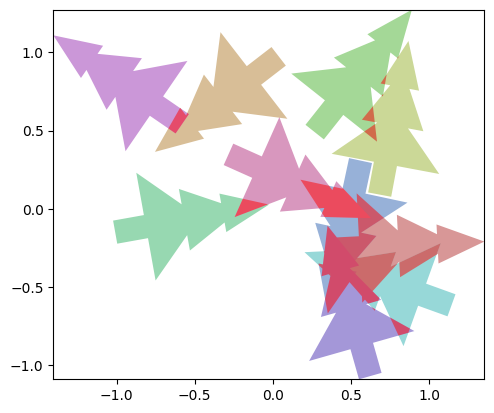

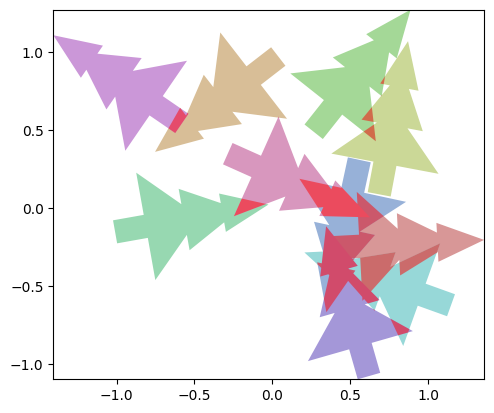

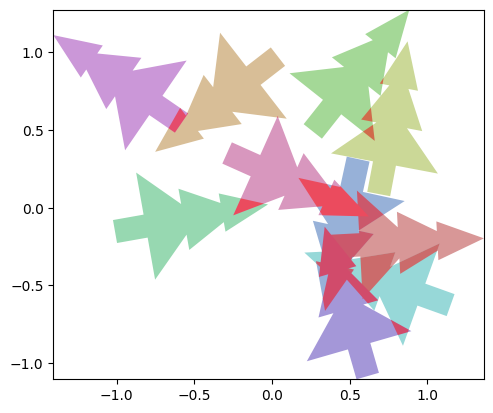

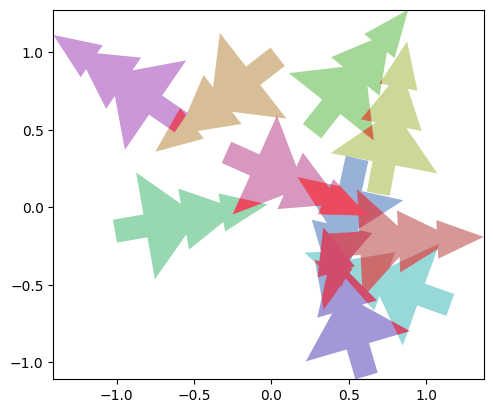

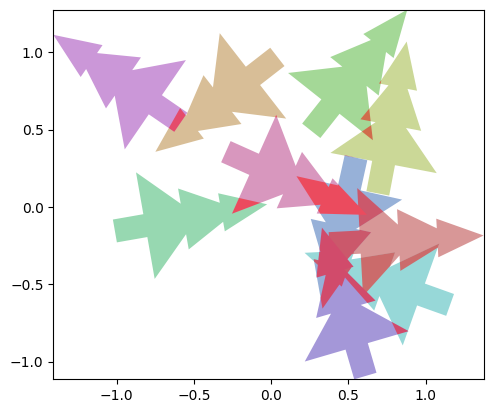

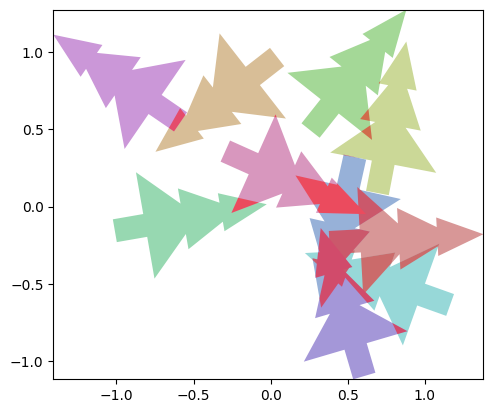

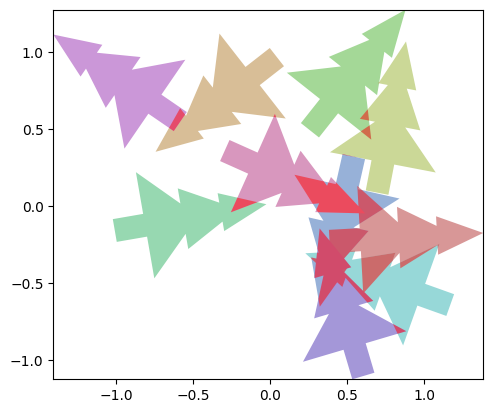

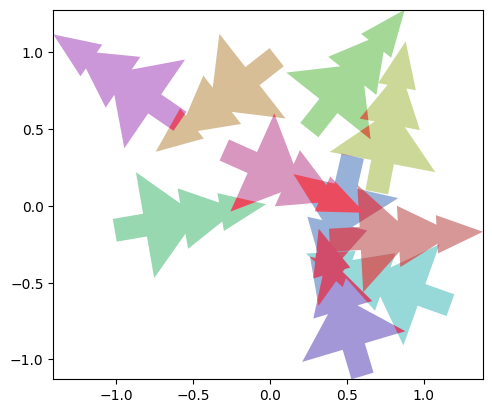

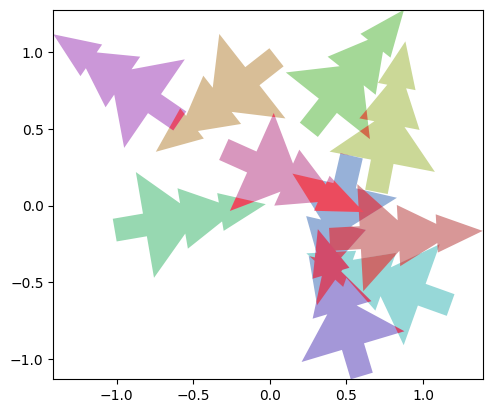

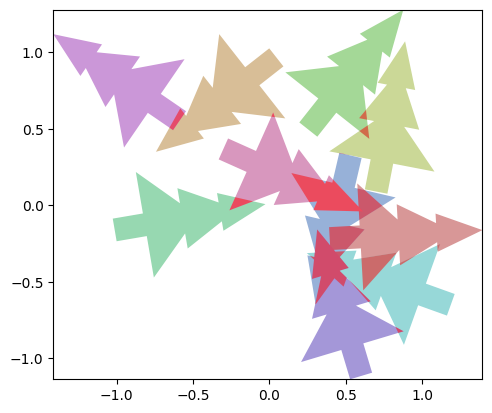

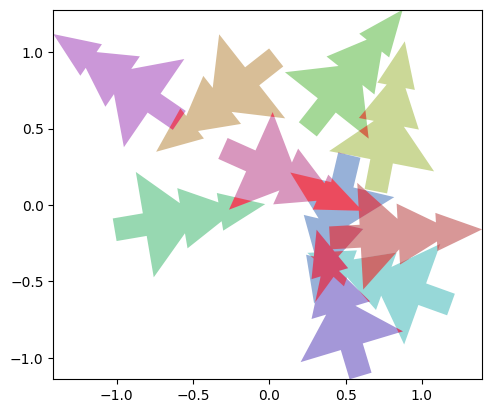

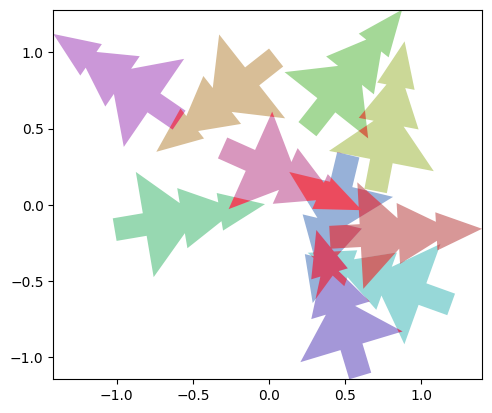

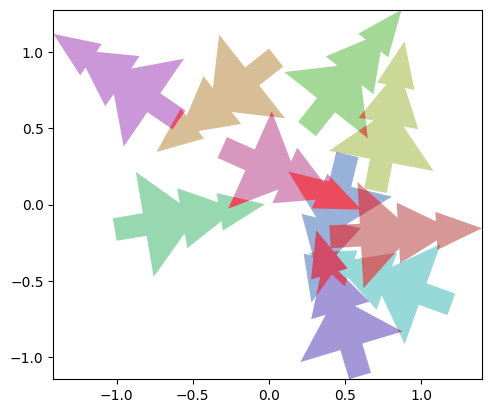

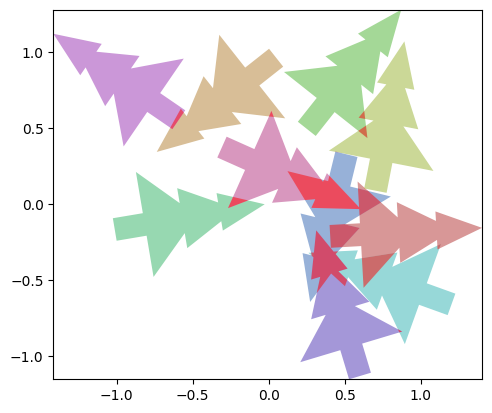

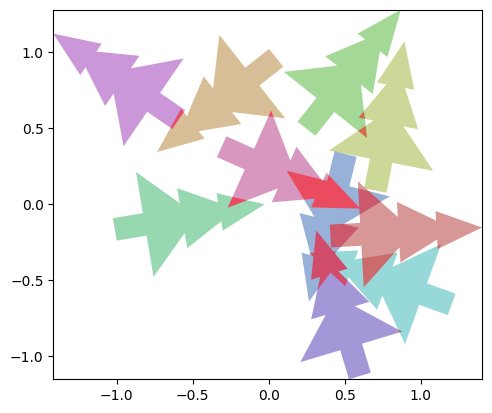

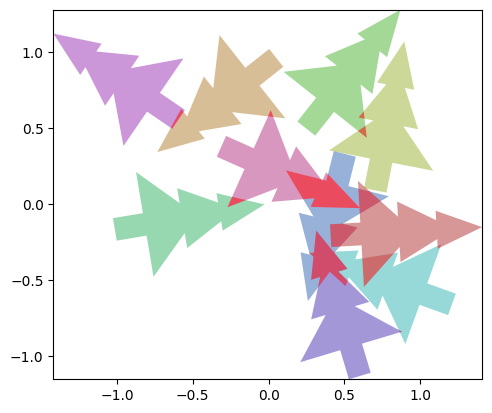

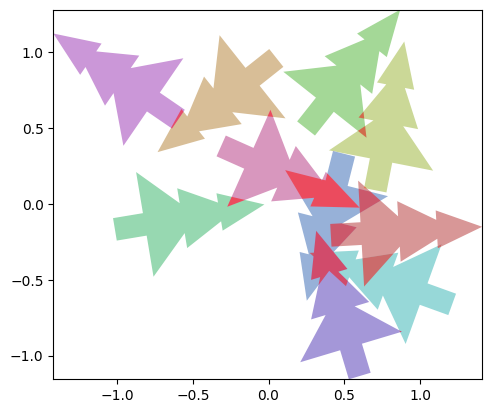

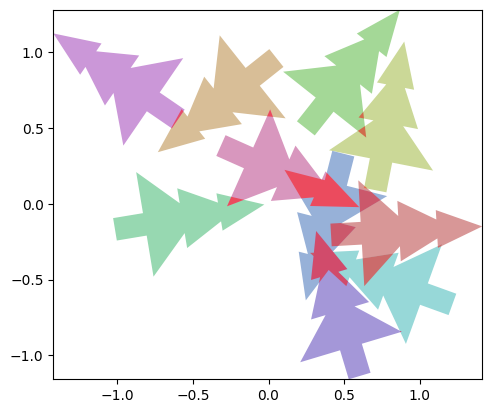

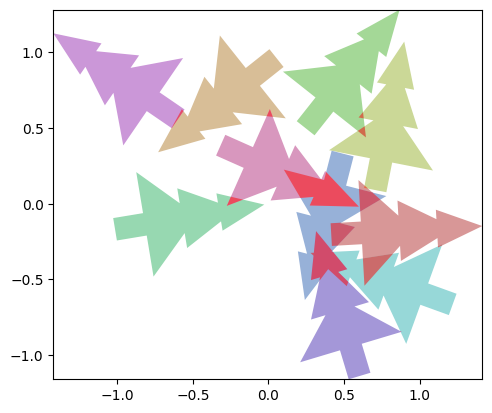

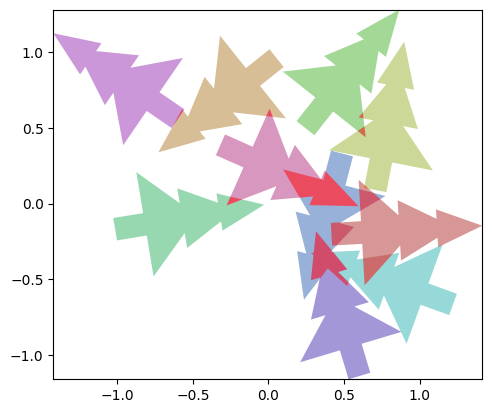

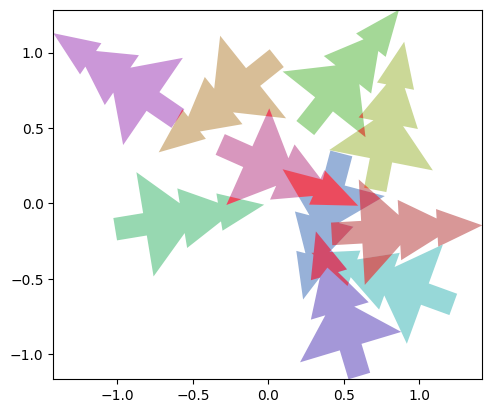

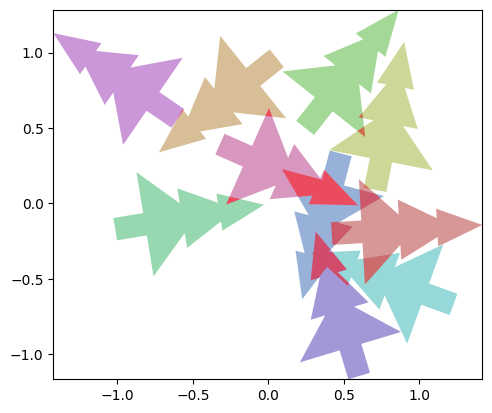

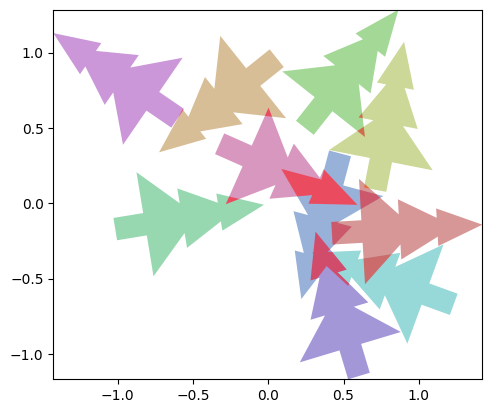

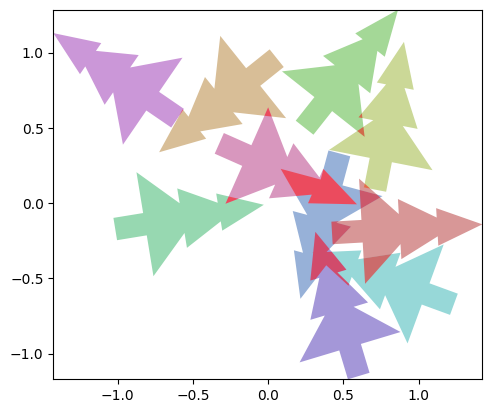

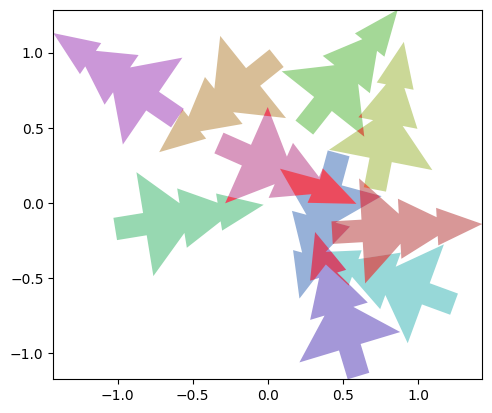

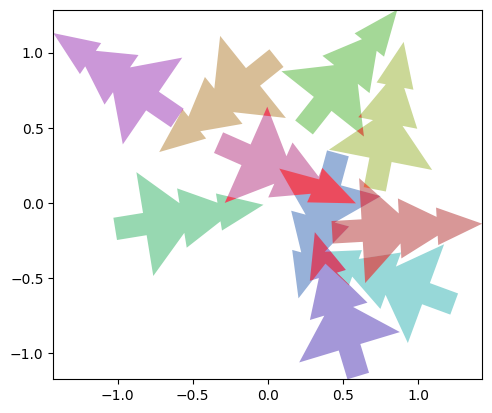

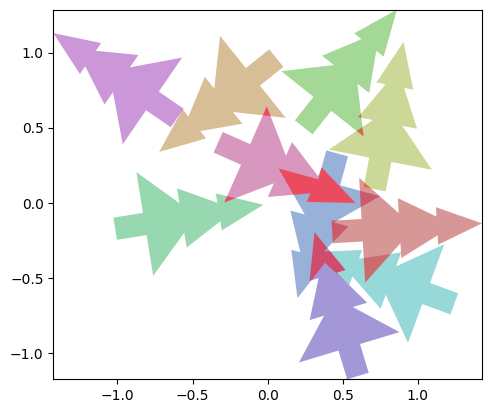

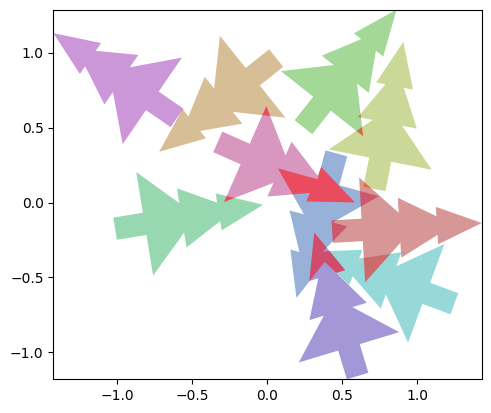

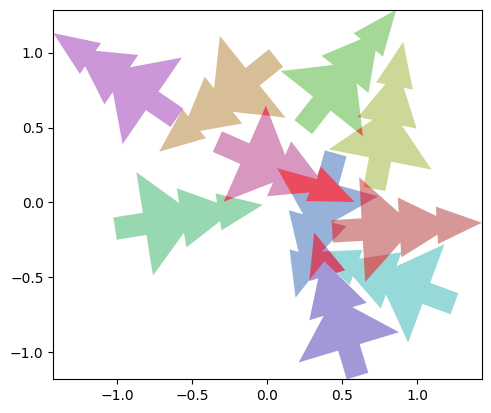

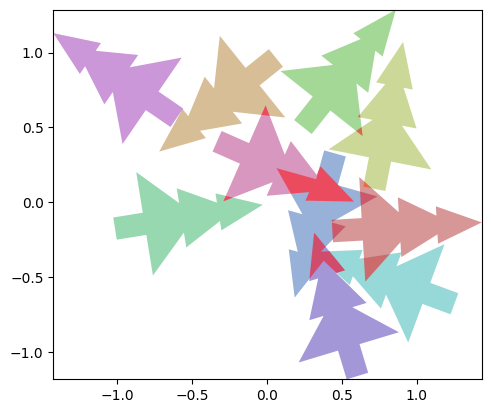

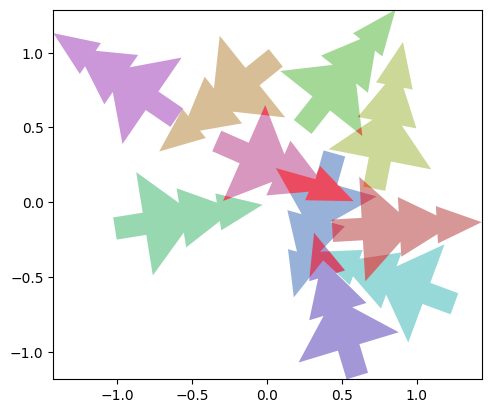

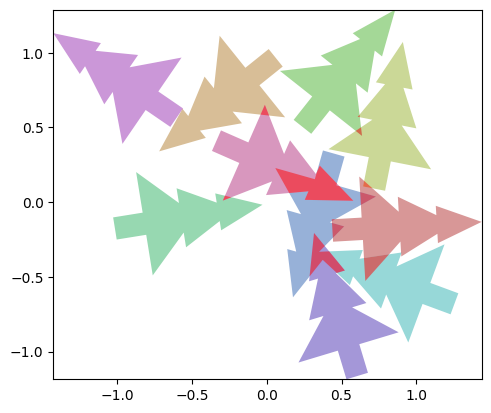

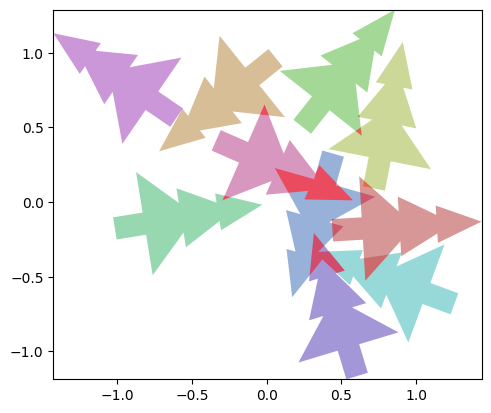

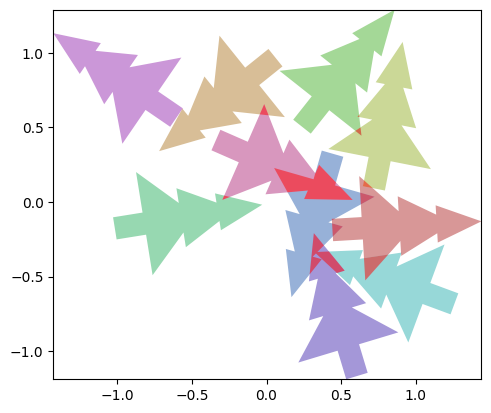

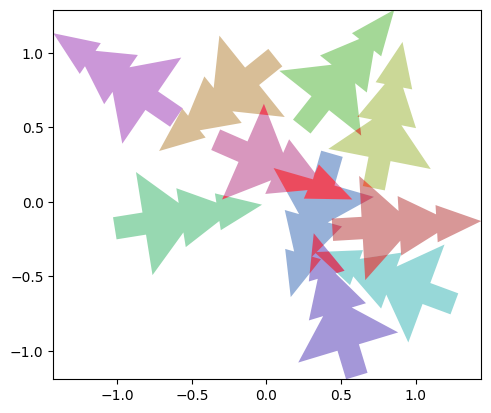

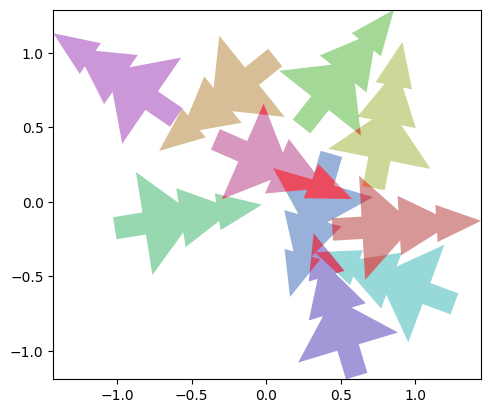

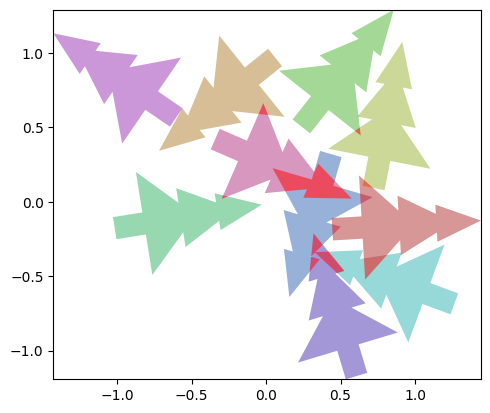

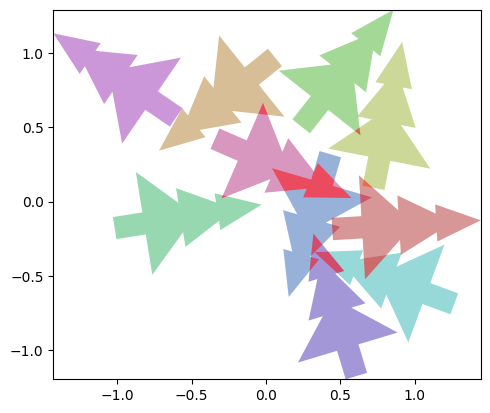

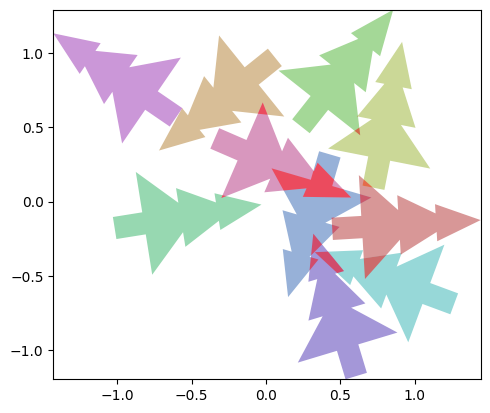

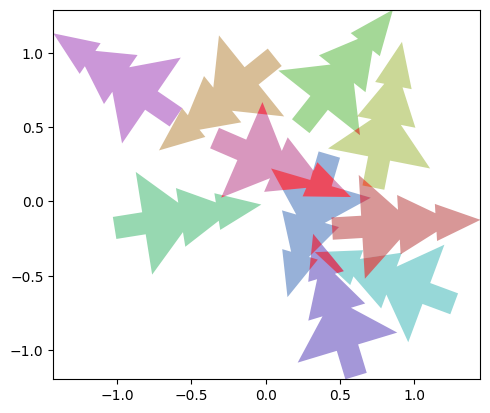

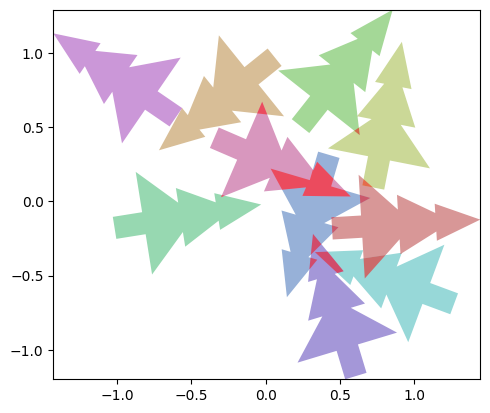

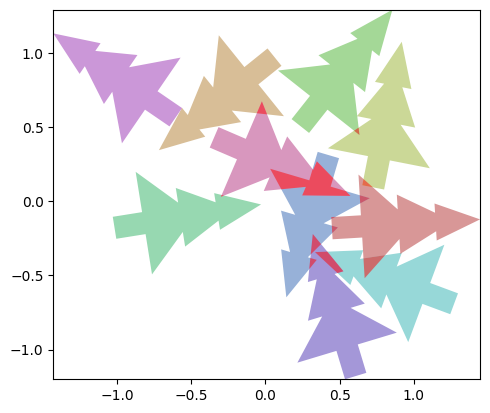

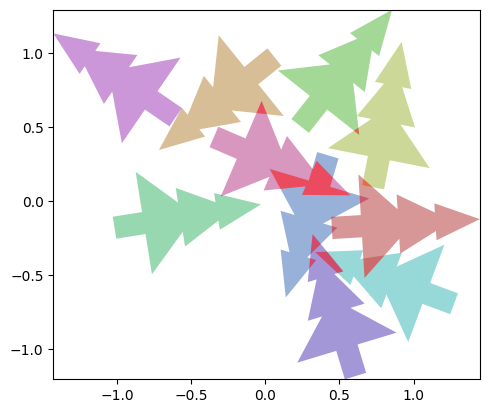

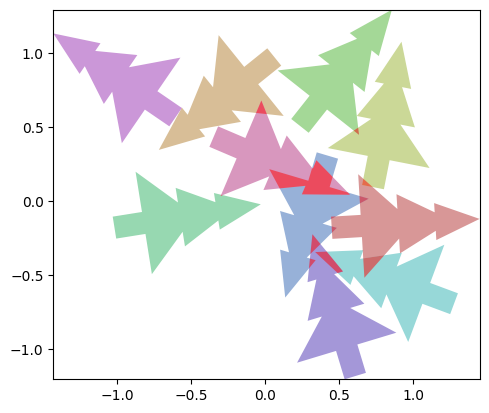

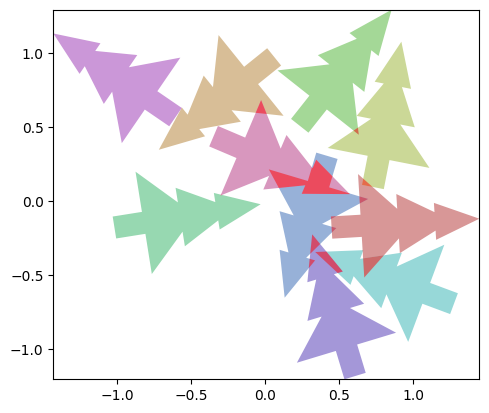

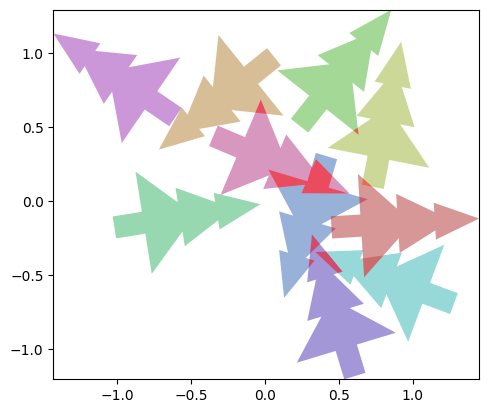

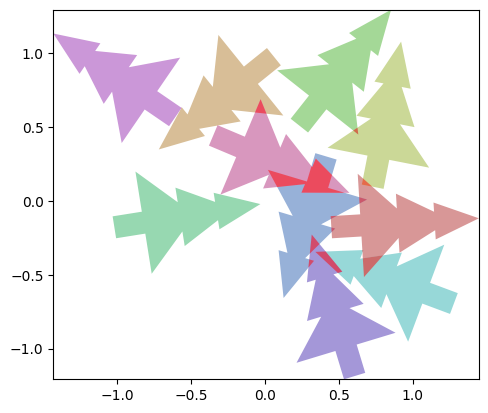

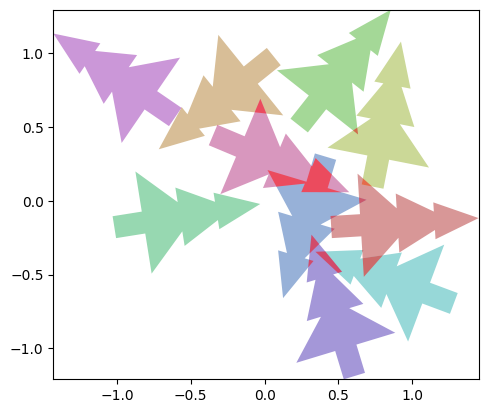

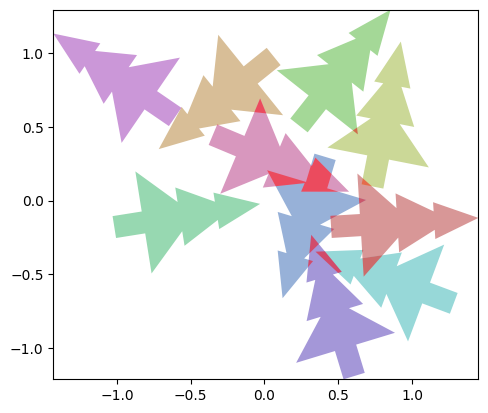

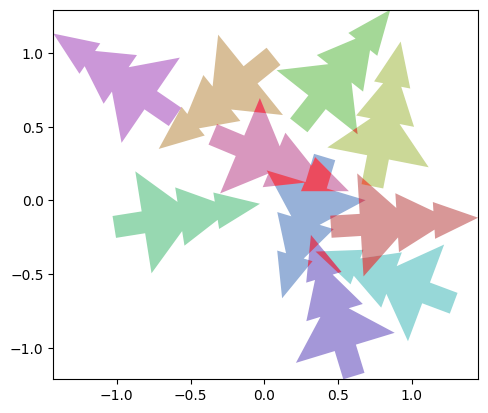

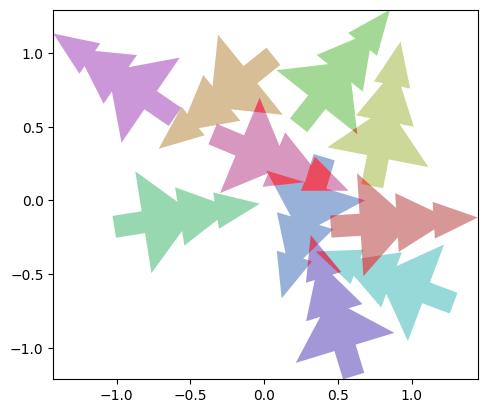

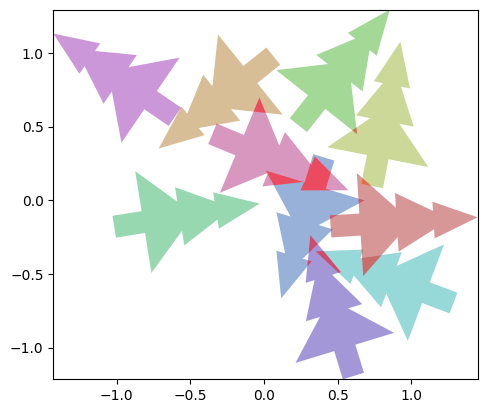

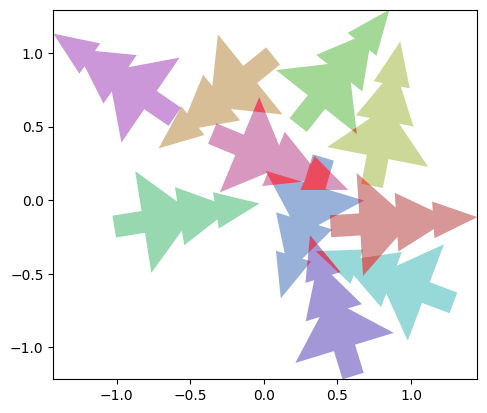

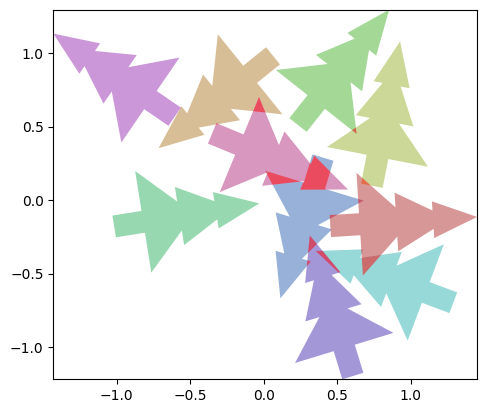

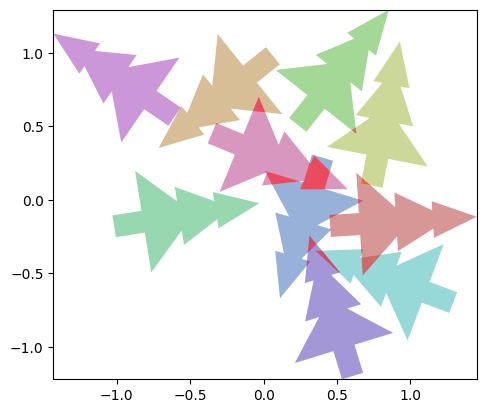

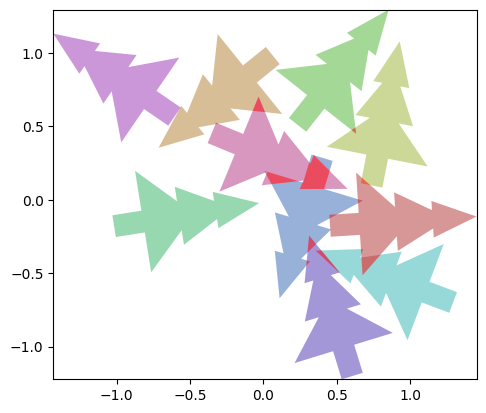

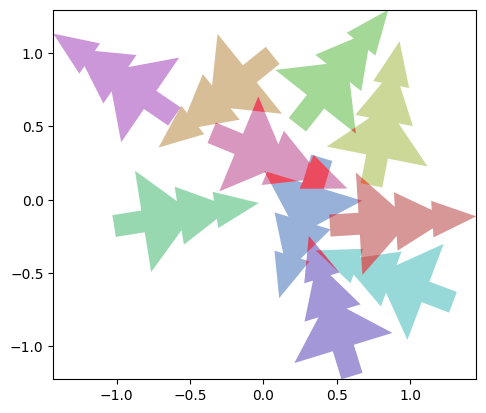

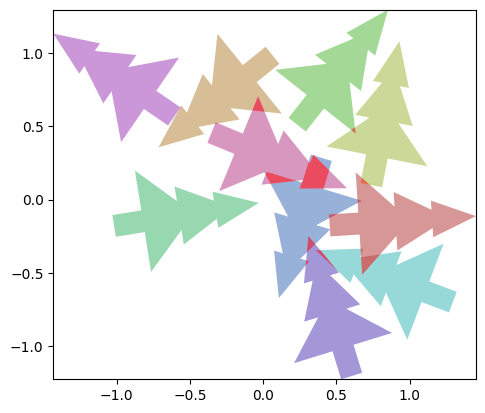

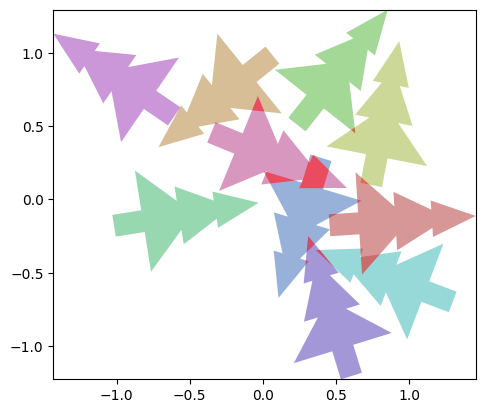

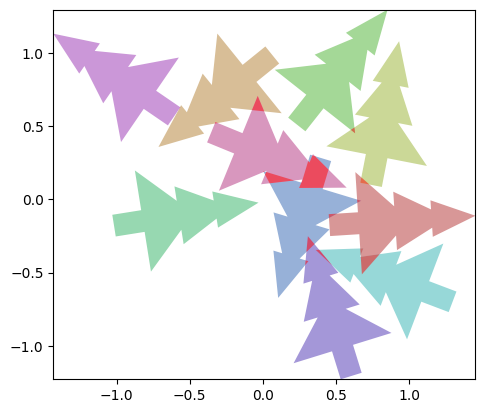

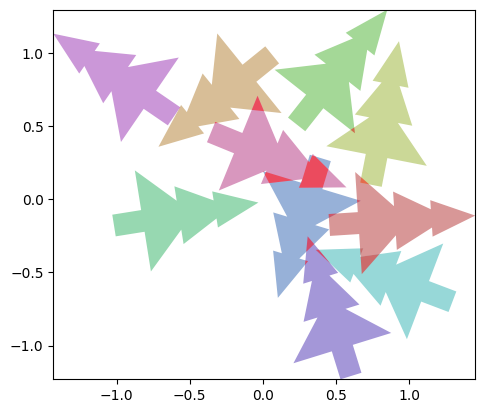

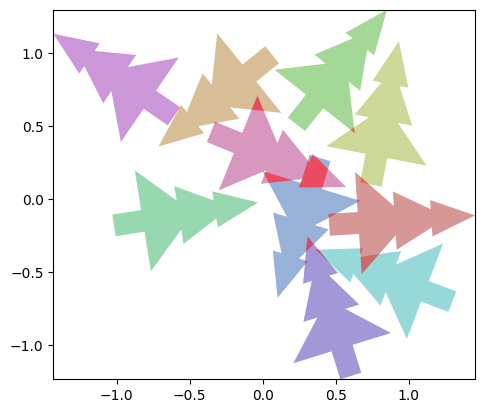

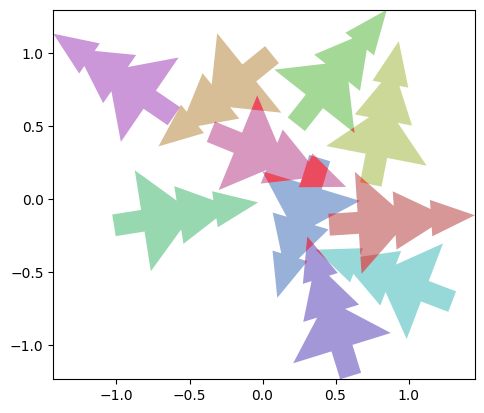

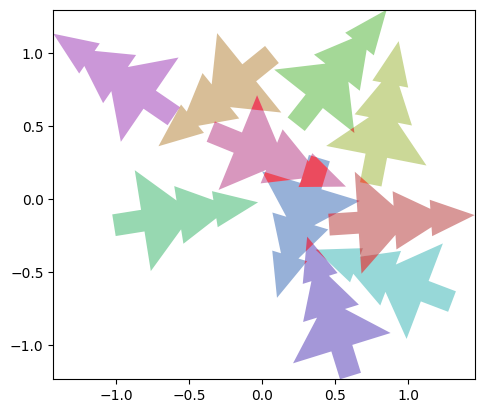

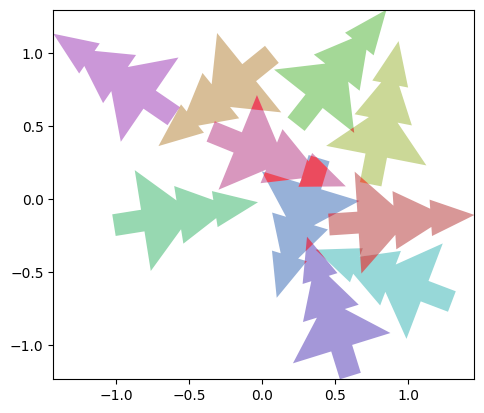

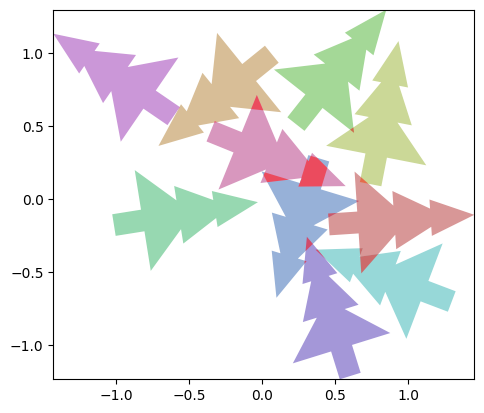

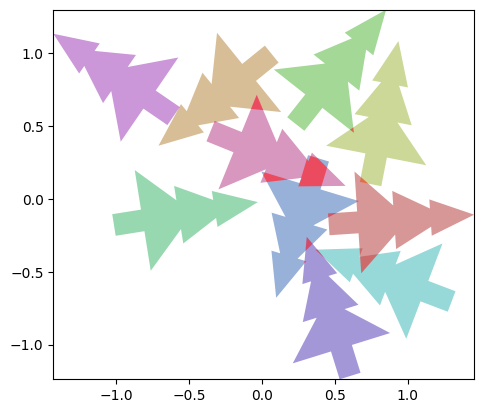

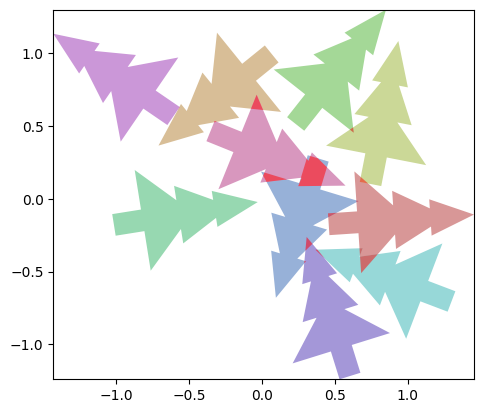

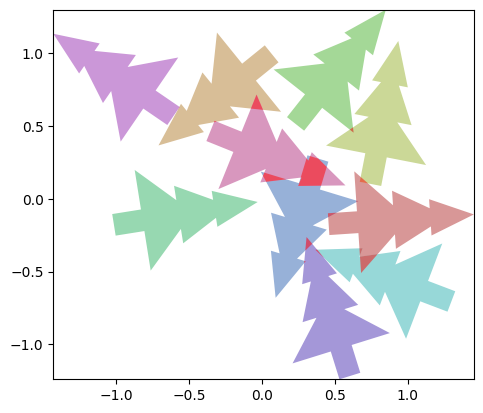

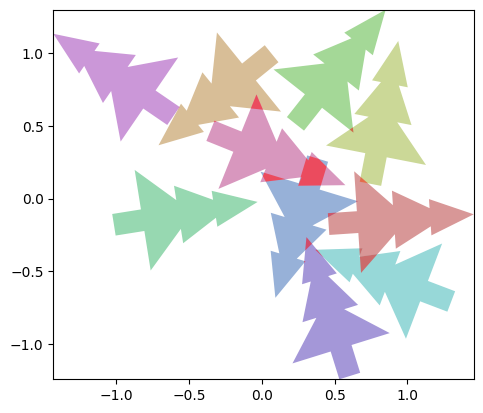

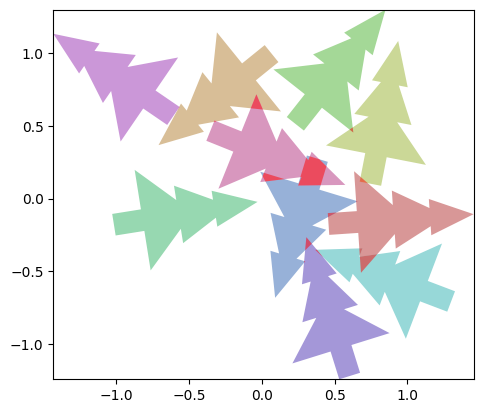

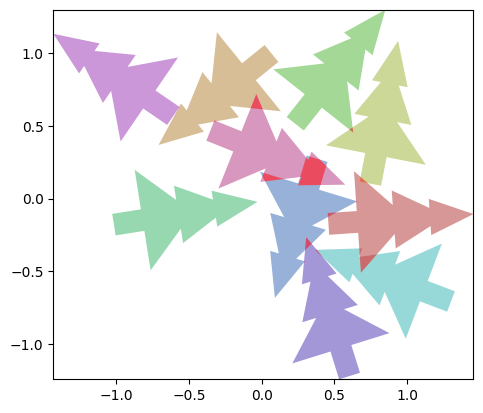

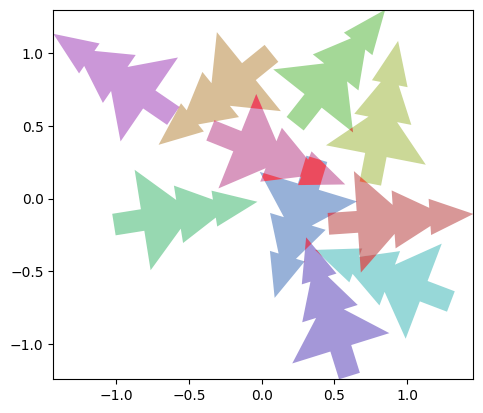

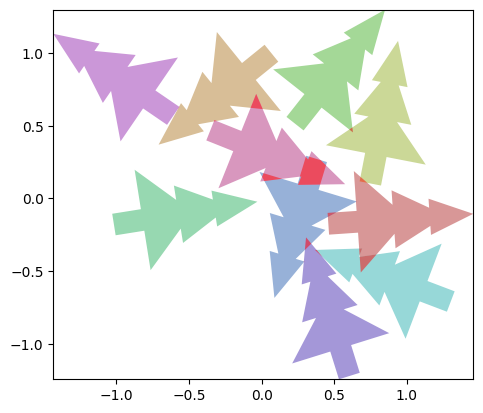

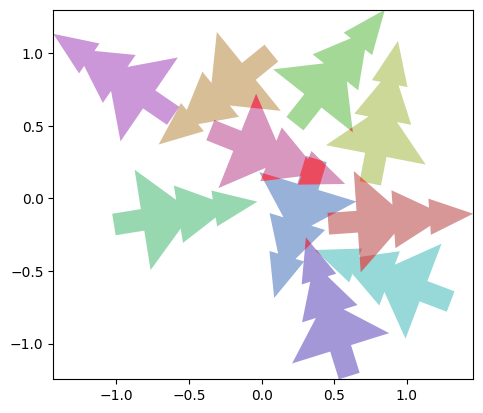

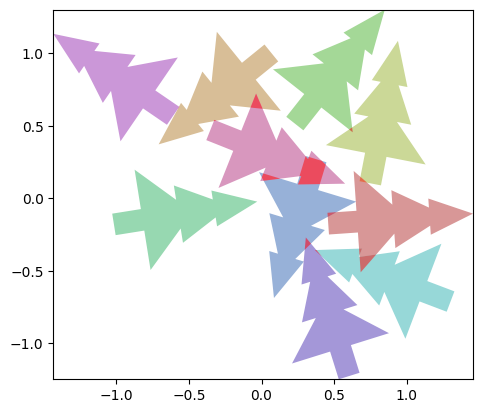

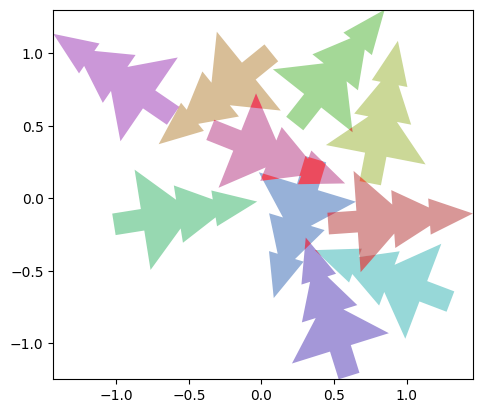

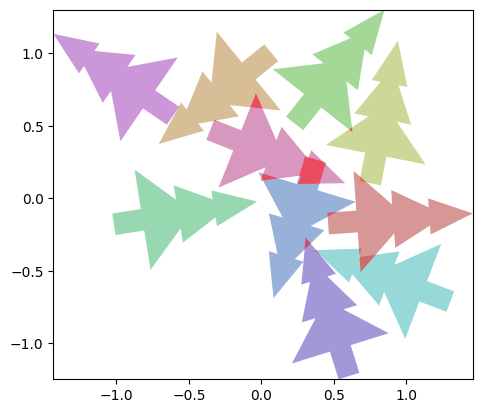

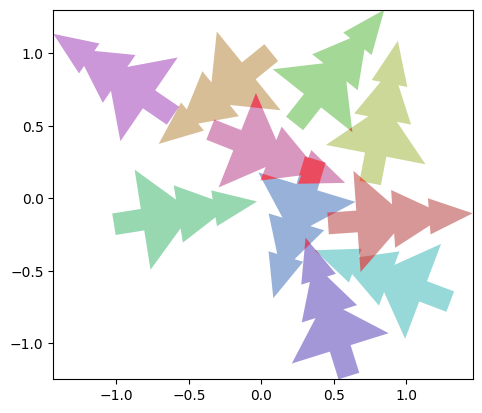

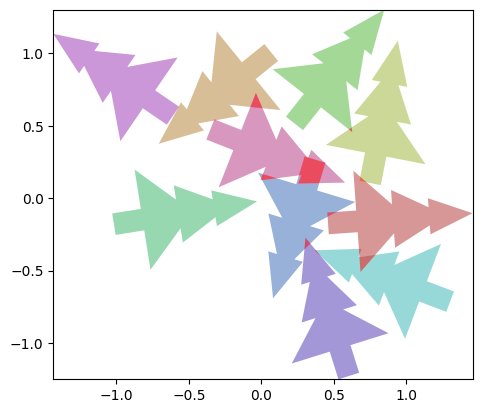

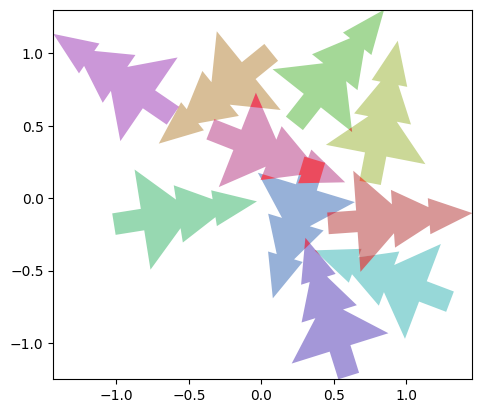

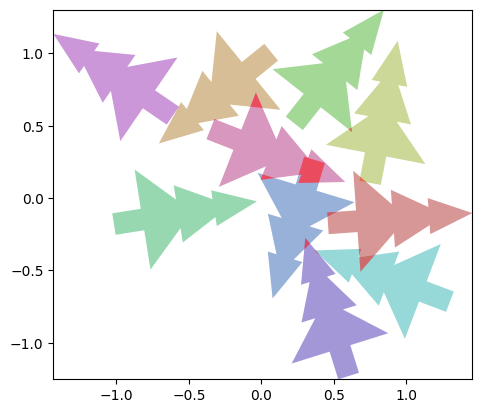

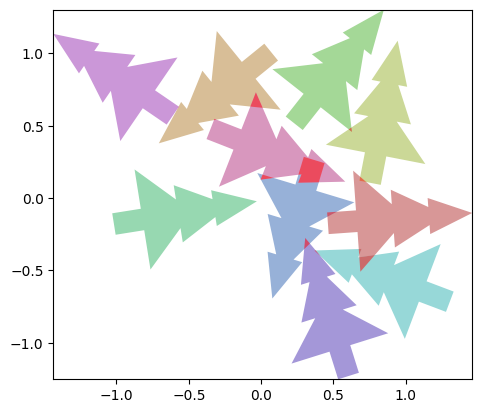

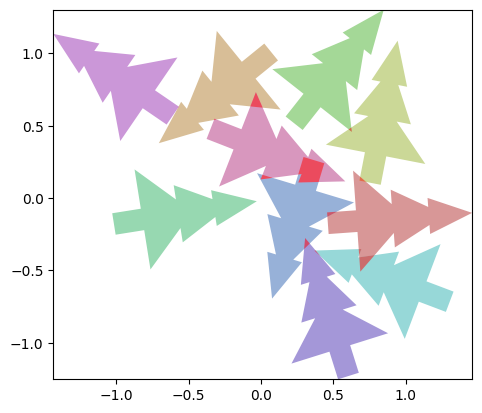

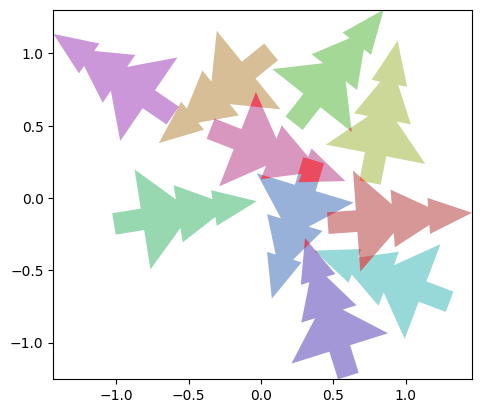

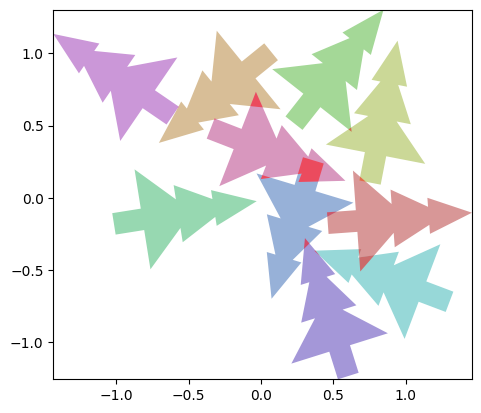

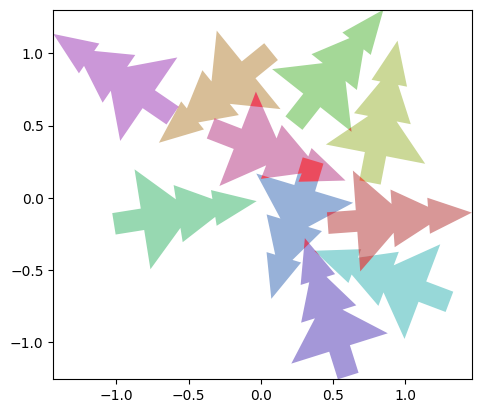

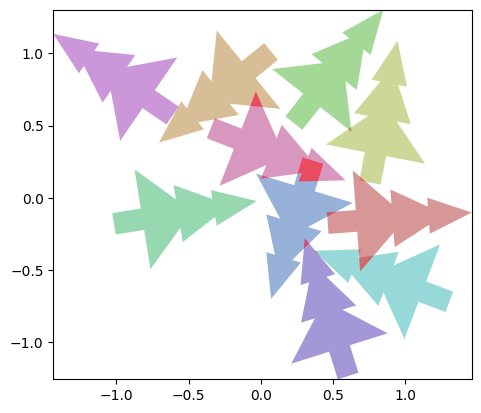

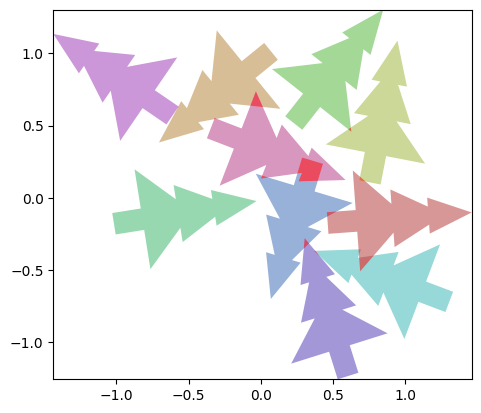

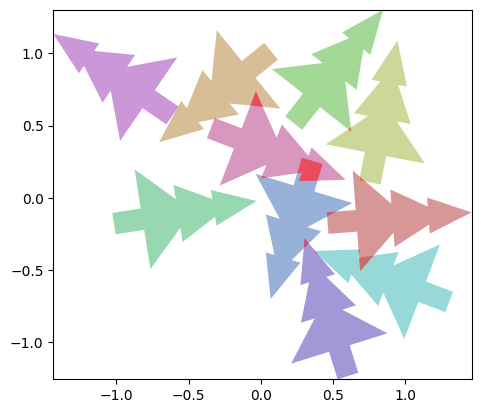

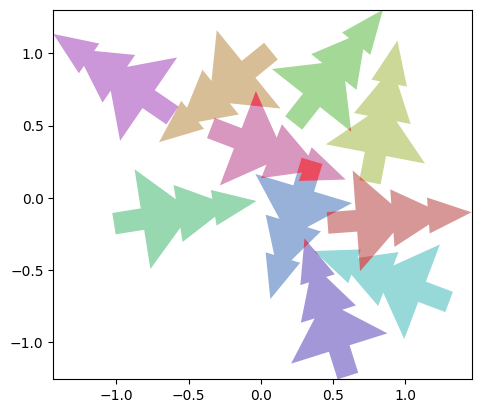

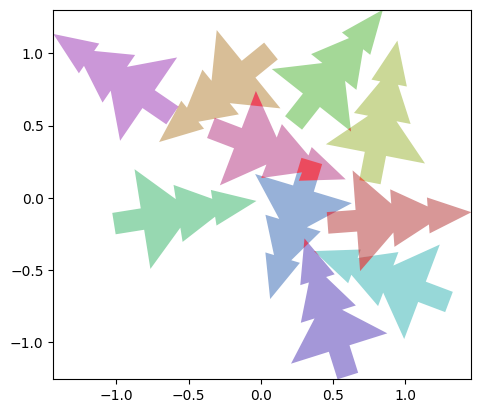

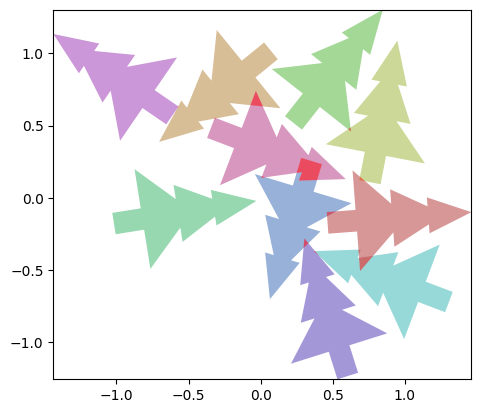

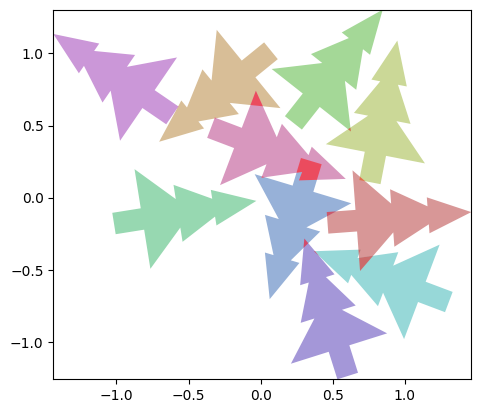

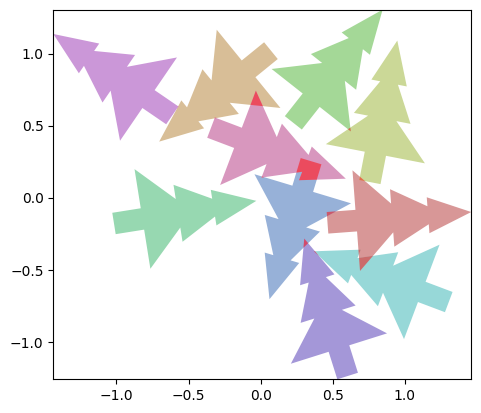

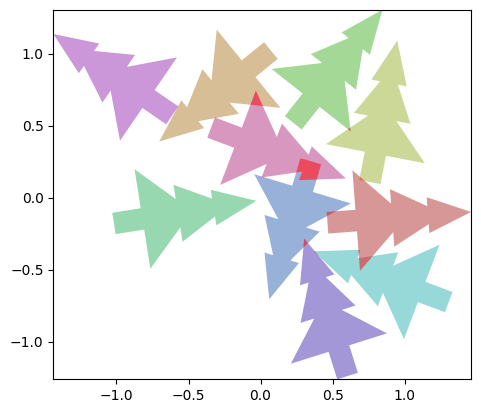

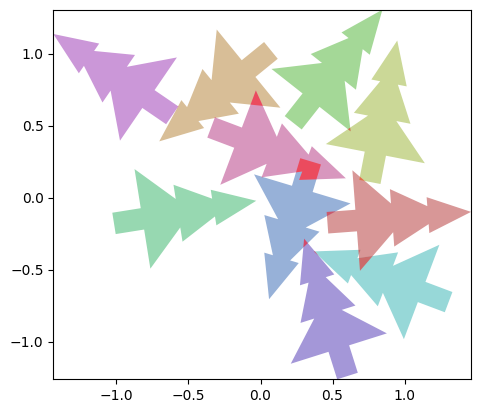

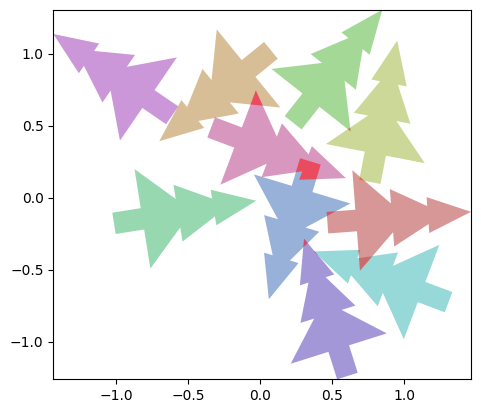

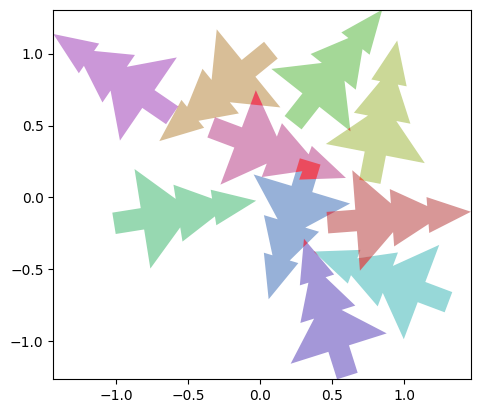

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))

def animate(i):
    ax.clear()
    tree_list.xyt = xyt_list[i]
    pack_vis.visualize_tree_list(tree_list, ax=ax)
    ax.set_title(f'Step {i}/{N_steps-1}')

anim = animation.FuncAnimation(fig, animate, frames=N_steps, interval=50)
plt.close()
HTML(anim.to_jshtml())